Data Analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/dwm/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

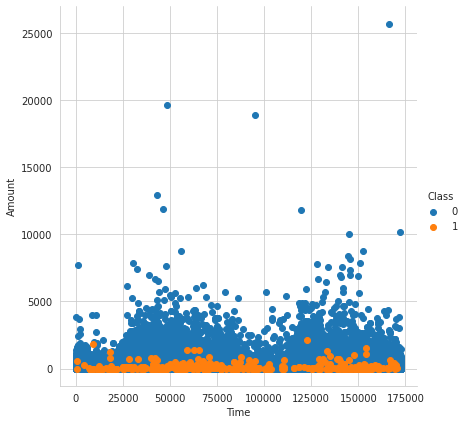

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", height = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

In [ ]:
Filter = data[['Time','Amount', 'Class']]
Filter

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [ ]:
Filter["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

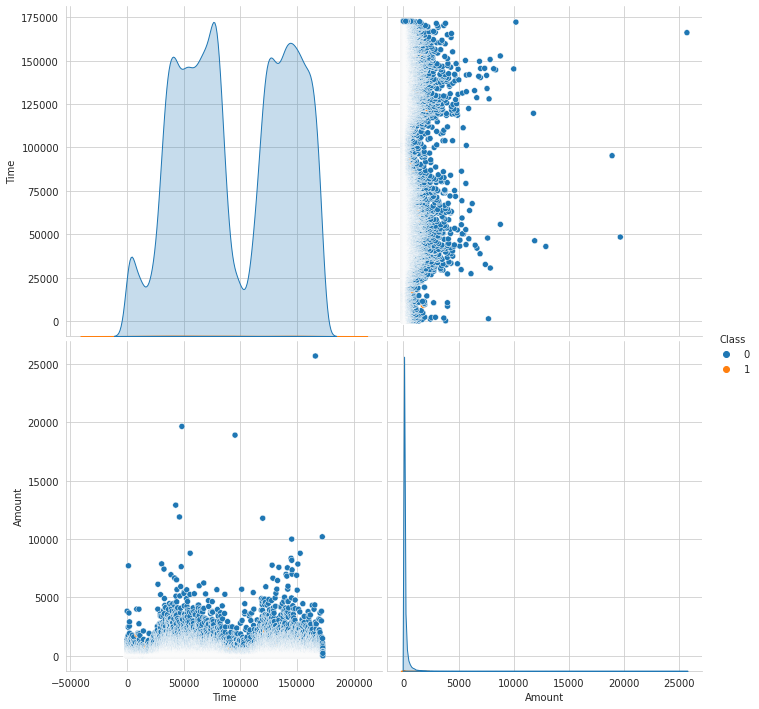

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Filter, hue="Class", height=5);
plt.show()

In [ ]:
countLess = 0
countMore= 0
for i in range(284806):
    if(Filter.iloc[i]["Amount"] < 2500):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)

284357
449


In [ ]:
percentage = (countLess/284807)*100
percentage

99.84199826549207

Now it has been calculated that there are 284357 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500

In [ ]:
class0 = 0
class1 = 0
for i in range(284806):
    if(Filter.iloc[i]["Amount"] < 2500):
        if(Filter.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print(class0)
print(class1)

283865
492


Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.

In [ ]:
#Mean Values
data_genuine = Filter.loc[Filter["Class"] == 0]
data_fraud = Filter.loc[Filter["Class"] == 1]
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(data_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(data_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.29102242225574
Mean of transaction amount of fraud transactions:  122.21132113821133


In [ ]:
#Standard Deviation
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(data_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(data_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  250.1046523874637
Std-Deviation of transaction amount of fraud transactions:  256.42229861324483


In [ ]:
#Median

In [ ]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(data_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(data_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


In [ ]:
print("\nQuantiles:")
print(np.percentile(data_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(data_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]


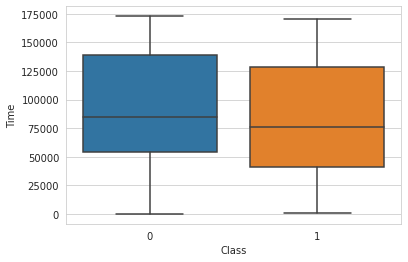

In [ ]:
#BOX PLOT
sns.boxplot(x = "Class", y = "Time", data = data)
plt.show()

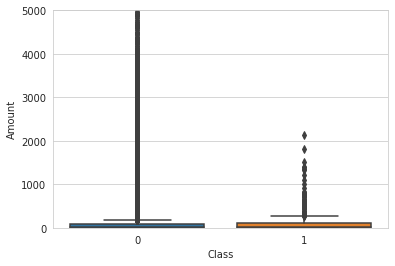

In [ ]:
sns.boxplot(x = "Class", y = "Amount", data = data)
plt.ylim(0, 5000)
plt.show()

1. By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.
2. From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000.

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


In [ ]:
#Data Cleaning
#Just removing all the NaN values and replacing with the mean.
x = data.iloc[: , 1:30].values
y = data.iloc[:, 30].values

In [ ]:
print("Input Shape : ", x.shape)
print("Output Shape : ", y.shape)

Input Shape :  (284807, 29)
Output Shape :  (284807,)


In [ ]:
data = data.replace('?',np.NaN) 
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of instances = 284807
Number of attributes = 31


In [ ]:
print('Number of missing values:')
for col in data.columns: 
  print('\t %s:%d' %(col, data[col].isna().sum()))

Number of missing values:
	 Time:0
	 V1:0
	 V2:0
	 V3:0
	 V4:0
	 V5:0
	 V6:0
	 V7:0
	 V8:0
	 V9:0
	 V10:0
	 V11:0
	 V12:0
	 V13:0
	 V14:0
	 V15:0
	 V16:0
	 V17:0
	 V18:0
	 V19:0
	 V20:0
	 V21:0
	 V22:0
	 V23:0
	 V24:0
	 V25:0
	 V26:0
	 V27:0
	 V28:0
	 Amount:0
	 Class:0


In [ ]:
data2 = data.fillna(data.mean()) 
print('Number of missing values:')
for col in data2.columns: 
  print('\t %s:%d' %(col, data2[col].isna().sum()))

Number of missing values:
	 Time:0
	 V1:0
	 V2:0
	 V3:0
	 V4:0
	 V5:0
	 V6:0
	 V7:0
	 V8:0
	 V9:0
	 V10:0
	 V11:0
	 V12:0
	 V13:0
	 V14:0
	 V15:0
	 V16:0
	 V17:0
	 V18:0
	 V19:0
	 V20:0
	 V21:0
	 V22:0
	 V23:0
	 V24:0
	 V25:0
	 V26:0
	 V27:0
	 V28:0
	 Amount:0
	 Class:0


In [ ]:
print(data)

            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]


In [ ]:
#KNN
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("xtest.shape  : ", xtest.shape)

xtrain.shape :  (213605, 29)
xtest.shape  :  (71202, 29)
ytrain.shape :  (213605,)
xtest.shape  :  (71202, 29)


In [ ]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
print("Standardised Training Set : \n", xtrain[0])

Standardised Training Set : 
 [ 1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446 -1.31399333
  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637  1.18028602
 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862 -0.39536117
  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189  0.90724443
  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]


In [ ]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred_decision_tree = dt_classifier.predict(xtest)
print("y_pred_decision_tree : \n", y_pred_decision_tree)

y_pred_decision_tree : 
 [0 0 0 ... 0 0 0]


In [ ]:
cm_decision = confusion_matrix(ytest, y_pred_decision_tree)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[71052    30]
 [   25    95]]


In [ ]:
Accuracy_Decison = ((cm_decision[0][0] + cm_decision[1][1]) / cm_decision.sum()) *100
print("Accuracy_Decison    : ", Accuracy_Decison)

Error_rate_Decison = ((cm_decision[0][1] + cm_decision[1][0]) / cm_decision.sum()) *100
print("Error_rate_Decison  : ", Error_rate_Decison)

# True Fake Recognition Rate
Specificity_Decison = (cm_decision[1][1] / (cm_decision[1][1] + cm_decision[0][1])) *100
print("Specificity_Decison : ", Specificity_Decison)

# True Genuine Recognition Rate
Sensitivity_Decison = (cm_decision[0][0] / (cm_decision[0][0] + cm_decision[1][0])) *100
print("Sensitivity_Decison : ", Sensitivity_Decison)

Accuracy_Decison    :  99.92275497879272
Error_rate_Decison  :  0.07724502120726946
Specificity_Decison :  76.0
Sensitivity_Decison :  99.96482687789299


In [ ]:
#Random Forest
from sklearn.svm import SVC
from sklearn.svm import SVR
svc_classifier = SVC(kernel = 'rbf', random_state =0)
svc_classifier.fit(xtrain, ytrain)

In [ ]:
y_pred2 = svc_classifier.predict(xtest)

print("y_pred_randomforest : \n", y_pred2)

y_pred_randomforest : 
 [0 0 0 ... 0 0 0]


In [ ]:
cm2 = confusion_matrix(ytest, y_pred2)
print("Confusion Matrix : \n\n", cm2)

Confusion Matrix : 

 [[71077     5]
 [   44    76]]


In [ ]:
# Validating the Prediction
Accuracy_svc = ((cm2[0][0] + cm2[1][1]) / cm2.sum()) *100
print("Accuracy_svc    : ", Accuracy_svc)

Error_rate_svc = ((cm2[0][1] + cm2[1][0]) / cm2.sum()) *100
print("Error_rate_svc  : ", Error_rate_svc)

# True Fake Recognition Rate
Specificity_svc = (cm2[1][1] / (cm2[1][1] + cm2[0][1])) *100
print("Specificity_svc : ", Specificity_svc)

# True Genuine Recognition Rate
Sensitivity_svc = (cm2[0][0] / (cm2[0][0] + cm2[1][0])) *100
print("Sensitivity_svc : ", Sensitivity_svc)

Accuracy_svc    :  99.93118170837899
Error_rate_svc  :  0.06881829162102188
Specificity_svc :  93.82716049382715
Sensitivity_svc :  99.93813360329578


In [ ]:
#Logistic Regression

In [ ]:
X = data.iloc[: , 1:30].values
Y = data.iloc[:, 30].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)
#25,75 test,train split
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


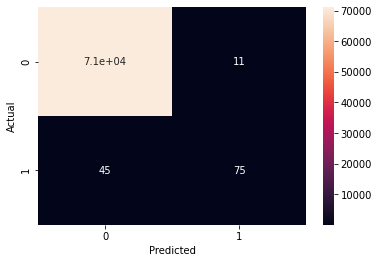

In [ ]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames = ['Actual'],colnames = ['Predicted'])
sn.heatmap(confusion_matrix, annot = True)
#71000-True Negative

In [ ]:
#K-Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=14)


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[71071,    11],
       [   45,    75]])

In [ ]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy: ',acc)

Accuracy:  0.9992135052386169


In [ ]:
from sklearn.metrics import precision_score, recall_score
p=precision_score(y_test, y_pred)
r=recall_score(y_test,y_pred)
print('Precision: ',p)
print('Recall: ',r)

Precision:  0.872093023255814
Recall:  0.625


In [ ]:
#f1-score
f1_score(y_test,y_pred)

0.7281553398058253

In [ ]:
#ROC and AUC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores=cross_val_predict(classifier,x_train,y_train,cv=3,method='predict')
precision,recalls,thresholds=precision_recall_curve(y_train,y_scores)


Text(0.5, 1.0, 'Precision Recall Curves')

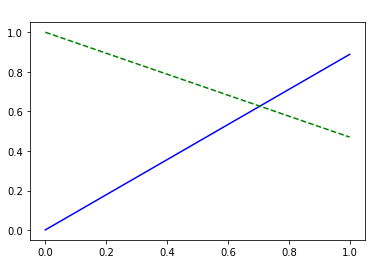

In [ ]:
plt.plot(thresholds,precision[:-1],'b-',label='Precision')
plt.plot(thresholds,recalls[:-1],'g--',label="Recall")
plt.xlabel('Threshold',color='white')
plt.title('Precision Recall Curves',color='white')

Text(0, 0.5, 'Recall')

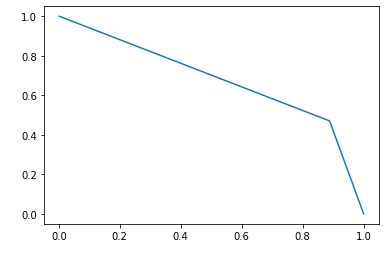

In [ ]:
plt.plot(precision,recalls)
plt.xlabel('Precisions',color='white')
plt.ylabel('Recall',color='white')

Text(0.5, 1.0, 'True Positive Rate')

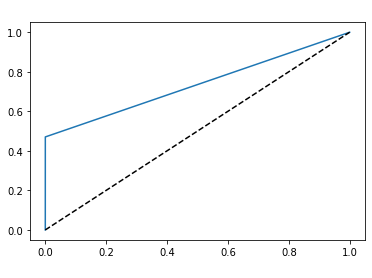

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_train,y_scores)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate', color='white')
plt.title('True Positive Rate', color='white')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.7351634670015419